
 Before Traffic Impact
Initially
Traffic on A → C path: 6 vehicles, time: 16.3 min, α: 0.74
Traffic on A → B path: 4 vehicles, time: 7.9 min, α: 0.41
Chosen Path: A → B → D → E, Total Travel Time: 10.9 min


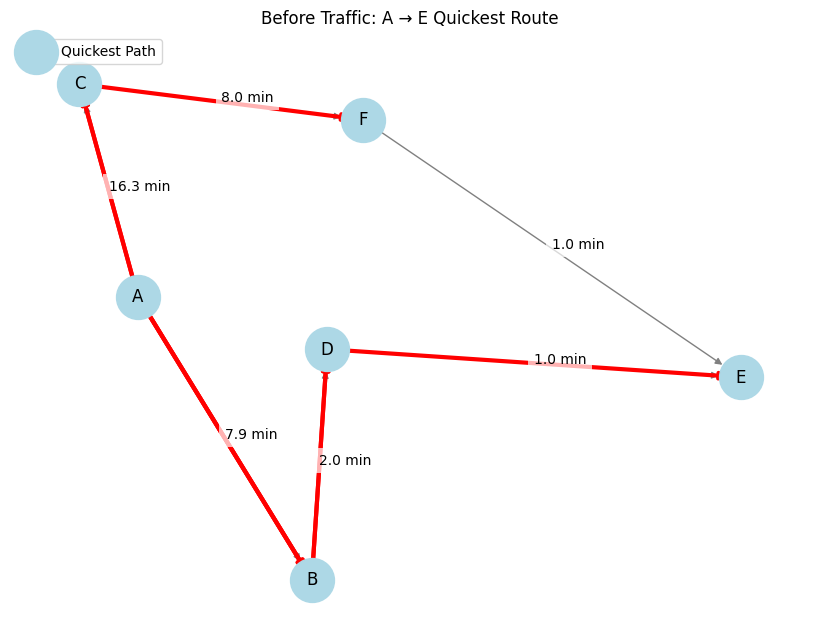


 After Traffic Impact
Traffic on A → C path: 3 vehicles, time: 4.0 min, α: 0.11
Traffic on A → B path: 5 vehicles, time: 17.6 min, α: 0.98
Chosen Path: A → C → F → E, Total Travel Time: 13.0 min

 Route changed! New quickest path is: A → C → F → E


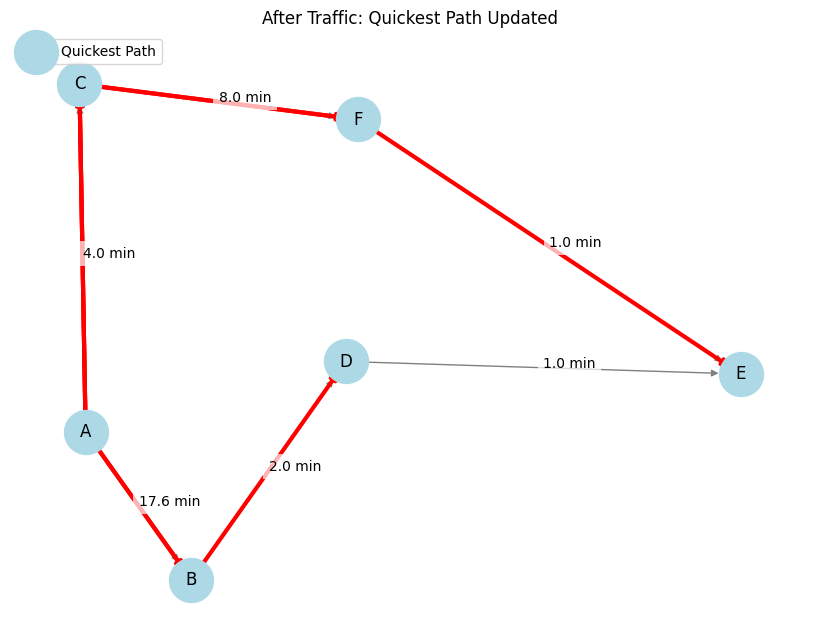

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def create_graph():
    G = nx.DiGraph()
    G.add_weighted_edges_from([
        ("A", "B", 5),
        ("A", "C", 5),
        ("B", "D", 2),
        ("D", "E", 1),
        ("C", "F", 8),
        ("F", "E", 1)
    ])
    return G

def adjust_travel_time(base_time, num_vehicles, alpha):
    density = num_vehicles
    return base_time * (1 + alpha * density)

def compute_travel_time(G, source):
    travel_times = nx.single_source_dijkstra_path_length(G, source, weight='weight')
    paths = nx.single_source_dijkstra_path(G, source, weight='weight')
    return travel_times, paths

def visualize_graph(G, paths, adjusted_weights, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, edge_color='gray')

    for node in paths:
        if node != "A":
            path_edges = list(zip(paths[node], paths[node][1:]))
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="red")

    edge_labels = {edge: f"{adjusted_weights[edge]:.1f} min" for edge in G.edges}
    for edge, label in edge_labels.items():
        x, y = (pos[edge[0]][0] + pos[edge[1]][0]) / 2, (pos[edge[0]][1] + pos[edge[1]][1]) / 2
        plt.text(x, y, label, fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.title(title)
    plt.legend(["Quickest Path"], loc="upper left")
    plt.show()

def update_edge_weight(G, u, v, new_weight):
    G[u][v]['weight'] = new_weight

G = create_graph()

lambda_rate = 1.5
time_period = 5
base_time = 3
initial_vehicles_A_C = 6
initial_vehicles_A_B = 4

def determine_alpha(vehicles):
    if vehicles < 5:
        return np.random.uniform(0.1, 0.5)
    elif 5 <= vehicles <= 10:
        return np.random.uniform(0.5, 1.0)
    else:
        return np.random.uniform(1.0, 2.0)

alpha_A_C = determine_alpha(initial_vehicles_A_C)
alpha_A_B = determine_alpha(initial_vehicles_A_B)

initial_time_A_C = adjust_travel_time(base_time, initial_vehicles_A_C, alpha_A_C)
initial_time_A_B = adjust_travel_time(base_time, initial_vehicles_A_B, alpha_A_B)
update_edge_weight(G, "A", "C", initial_time_A_C)
update_edge_weight(G, "A", "B", initial_time_A_B)

travel_times_before, paths_before = compute_travel_time(G, "A")
path_to_E_before = paths_before.get("E", [])
total_time_before = sum(G[u][v]['weight'] for u, v in zip(path_to_E_before, path_to_E_before[1:]))

print(f"\n Before Traffic Impact")
print(f"Initially\nTraffic on A → C path: {initial_vehicles_A_C} vehicles, time: {initial_time_A_C:.1f} min, α: {alpha_A_C:.2f}")
print(f"Traffic on A → B path: {initial_vehicles_A_B} vehicles, time: {initial_time_A_B:.1f} min, α: {alpha_A_B:.2f}")
print(f"Chosen Path: {' → '.join(path_to_E_before)}, Total Travel Time: {total_time_before:.1f} min")

visualize_graph(G, paths_before, nx.get_edge_attributes(G, 'weight'), "Before Traffic: A → E Quickest Route")

new_vehicles_A_C = np.random.poisson(lambda_rate * time_period)
new_vehicles_A_B = np.random.poisson(lambda_rate * time_period)

alpha_A_C = determine_alpha(new_vehicles_A_C)
alpha_A_B = determine_alpha(new_vehicles_A_B)

updated_time_A_C = adjust_travel_time(base_time, new_vehicles_A_C, alpha_A_C)
updated_time_A_B = adjust_travel_time(base_time, new_vehicles_A_B, alpha_A_B)
update_edge_weight(G, "A", "C", updated_time_A_C)
update_edge_weight(G, "A", "B", updated_time_A_B)

travel_times_after, paths_after = compute_travel_time(G, "A")
path_to_E_after = paths_after.get("E", [])
total_time_after = sum(G[u][v]['weight'] for u, v in zip(path_to_E_after, path_to_E_after[1:]))

print(f"\n After Traffic Impact")
print(f"Traffic on A → C path: {new_vehicles_A_C} vehicles, time: {updated_time_A_C:.1f} min, α: {alpha_A_C:.2f}")
print(f"Traffic on A → B path: {new_vehicles_A_B} vehicles, time: {updated_time_A_B:.1f} min, α: {alpha_A_B:.2f}")
print(f"Chosen Path: {' → '.join(path_to_E_after)}, Total Travel Time: {total_time_after:.1f} min")

if path_to_E_before == path_to_E_after:
    print("\n Route remains the same: A → E is still quickest.")
else:
    print("\n Route changed! New quickest path is:", " → ".join(path_to_E_after))

visualize_graph(G, paths_after, nx.get_edge_attributes(G, 'weight'), "After Traffic: Quickest Path Updated")
